In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
from nilearn import plotting

FILE_FOLDER_PATH = 'data/MRI/Patient-'
N_PATIENTS = 60

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[Dataset](https://data.mendeley.com/datasets/8bctsm8jz7/1), also available on [Kaggle](https://www.kaggle.com/datasets/trainingdatapro/multiple-sclerosis-dataset)

[Paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9043670/pdf/main.pdf)

In [2]:
def read_nii_file(file_path):
    # Load the .nii file
    img = nib.load(file_path)

    # Access the image data
    data = img.get_fdata()

    return img, data

def read_patient_data(patient_number):
    patient_path = FILE_FOLDER_PATH + str(patient_number) + '/' + str(patient_number)
    flair_img, flair_data = read_nii_file(patient_path + '-Flair.nii')
    lesion_seg_flair_img, lesion_seg_flair_data = read_nii_file(patient_path + '-LesionSeg-Flair.nii')
    lesion_seg_T1_img, lesion_seg_T1_data = read_nii_file(patient_path + '-LesionSeg-T1.nii')
    lesion_seg_t2_img, lesion_seg_t2_data = read_nii_file(patient_path + '-LesionSeg-T2.nii')
    t1_img, t1_data = read_nii_file(patient_path + '-T1.nii')
    t2_img, t2_data = read_nii_file(patient_path + '-T2.nii')

    return [flair_img, lesion_seg_flair_img, lesion_seg_T1_img, lesion_seg_t2_img, t1_img, t2_img, 
            flair_data, lesion_seg_flair_data, lesion_seg_T1_data, lesion_seg_t2_data, t1_data, t2_data]

In [3]:
patiens_img_dict = {}
patiens_data_dict = {}

for patient_number in range(1, N_PATIENTS + 1):
    [flair_img, lesion_seg_flair_img, lesion_seg_T1_img, lesion_seg_t2_img, t1_img, t2_img,
    flair_data, lesion_seg_flair_data, lesion_seg_T1_data, lesion_seg_t2_data, t1_data, t2_data] = read_patient_data(patient_number)

    patiens_img_dict[patient_number] = {}
    patiens_img_dict[patient_number]['flair'] = flair_img
    patiens_img_dict[patient_number]['lesion_seg_flair'] = lesion_seg_flair_img
    patiens_img_dict[patient_number]['lesion_seg_T1'] = lesion_seg_T1_img
    patiens_img_dict[patient_number]['lesion_seg_t2'] = lesion_seg_t2_img
    patiens_img_dict[patient_number]['t1'] = t1_img
    patiens_img_dict[patient_number]['t2'] = t2_img

    patiens_data_dict[patient_number] = {}
    patiens_data_dict[patient_number]['flair'] = flair_data
    patiens_data_dict[patient_number]['lesion_seg_flair'] = lesion_seg_flair_data
    patiens_data_dict[patient_number]['lesion_seg_T1'] = lesion_seg_T1_data
    patiens_data_dict[patient_number]['lesion_seg_t2'] = lesion_seg_t2_data
    patiens_data_dict[patient_number]['t1'] = t1_data
    patiens_data_dict[patient_number]['t2'] = t2_data

In [4]:
patiens_data_dict[1].keys()

dict_keys(['flair', 'lesion_seg_flair', 'lesion_seg_T1', 'lesion_seg_t2', 't1', 't2'])

In [5]:
image_dims_df = pd.DataFrame()

for patient_number in range(1, N_PATIENTS + 1):
    patient_df =  pd.DataFrame()
    for key in patiens_data_dict[patient_number].keys():
        dim_df = pd.DataFrame({
            "width": patiens_data_dict[patient_number][key].shape[0], # width
            "height": patiens_data_dict[patient_number][key].shape[1], # height
            "slices": patiens_data_dict[patient_number][key].shape[2]}, # number of slices
            index=[patient_number])
        patient_df = pd.concat([patient_df, dim_df], axis=1)
    
    image_dims_df = pd.concat([image_dims_df, patient_df])
        
# add multi index columns
columns = ['Flair', 'Lesion Seg Flair', 'Lesion Seg T1', 'Lesion Seg T2', 'T1', 'T2']
image_dims_df.columns = pd.MultiIndex.from_product([columns, ['width', 'height', 'slices']])
image_dims_df.head(3)

Flair               Lesion Seg Flair               Lesion Seg T1         \
  width height slices            width height slices         width height   
1   256    256     23              256    256     23           512    512   
2   320    280     23              320    280     23           512    448   
3   320    280     20              320    280     20           512    448   

         Lesion Seg T2                  T1                  T2                
  slices         width height slices width height slices width height slices  
1     19           256    256     19   512    512     19   256    256     19  
2     20           512    464     22   512    448     20   512    464     22  
3     20           512    464     20   512    448     20   512    464     20

In [6]:
def plot_slice(ax, slice_num, img, title=''):
    ax.imshow(img[:, :, slice_num], cmap='gray')
    ax.set_title(title)
    ax.axis('off')

def plot_patient_slice(patient_number, slice_num):
    fig, axs = plt.subplots(2, 3, figsize=(8, 6))
    fig.suptitle('Patient 1 MRI Images - Slice ' + str(slice_num))
    plot_slice(axs[0, 0], slice_num, patiens_data_dict[patient_number]['flair'], 'Flair')
    plot_slice(axs[0, 1], slice_num, patiens_data_dict[patient_number]['lesion_seg_flair'], 'Lesion Seg Flair')
    plot_slice(axs[0, 2], slice_num, patiens_data_dict[patient_number]['lesion_seg_T1'], 'Lesion Seg T1')
    plot_slice(axs[1, 0], slice_num, patiens_data_dict[patient_number]['lesion_seg_t2'], 'Lesion Seg T2')
    plot_slice(axs[1, 1], slice_num, patiens_data_dict[patient_number]['t1'], 'T1')
    plot_slice(axs[1, 2], slice_num, patiens_data_dict[patient_number]['t2'], 'T2')
    plt.show()

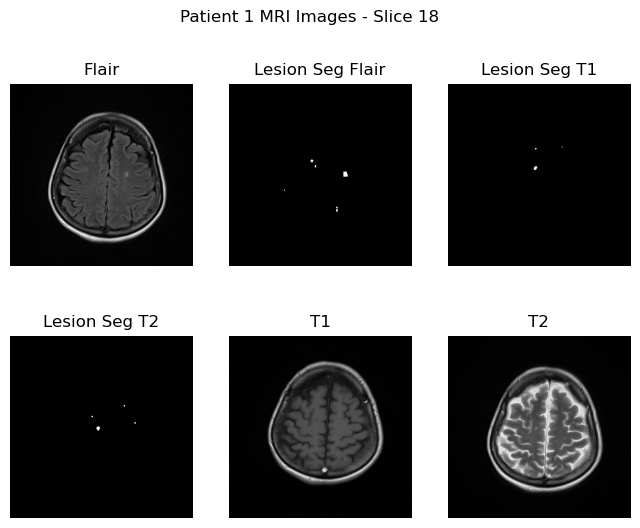

In [7]:
plot_patient_slice(patient_number=1, slice_num=18)

In [8]:
def plot_single_slice(img, title=''):
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

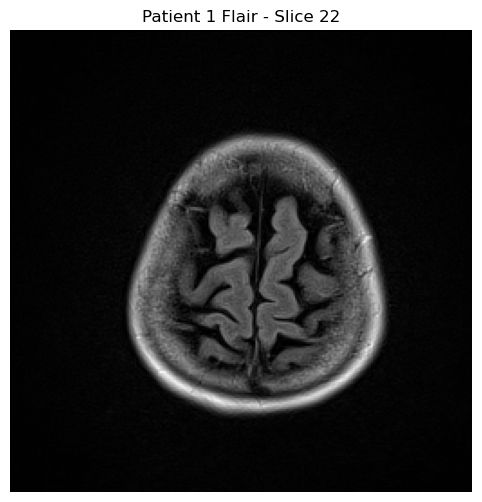

In [9]:
plot_single_slice(patiens_data_dict[1]['flair'][:, :, 22], 'Patient 1 Flair - Slice 22')

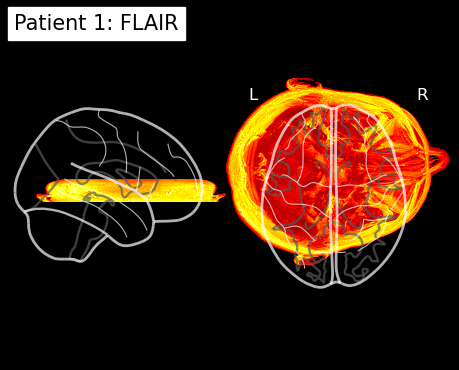

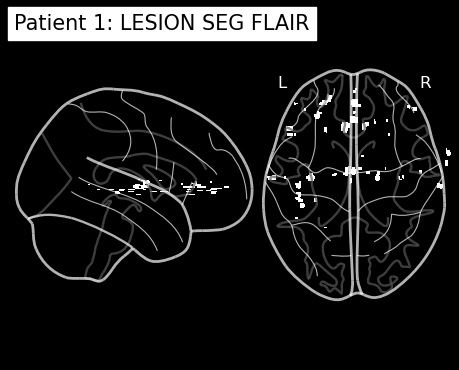

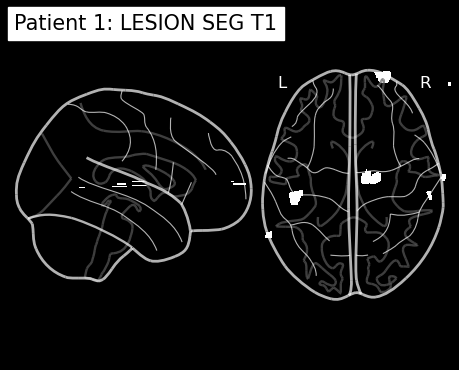

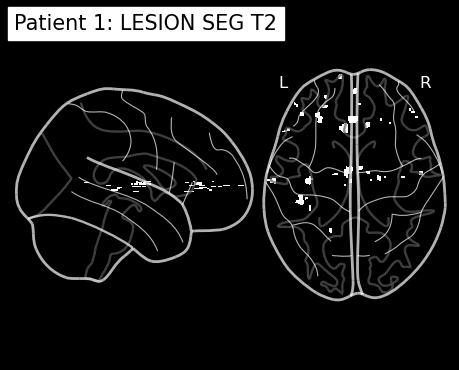

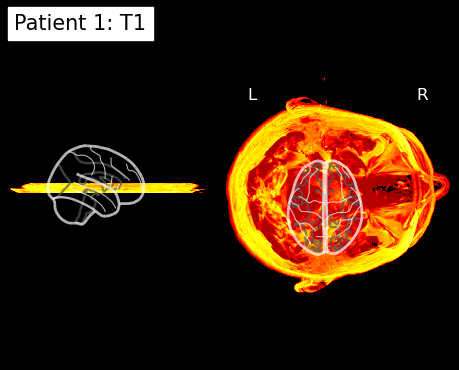

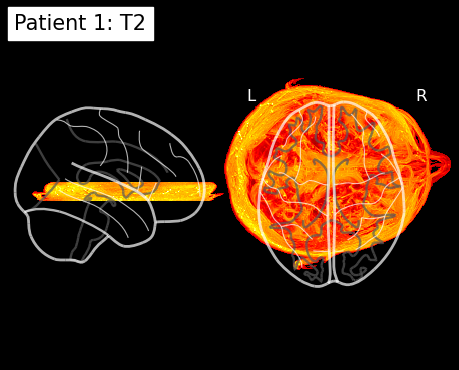

In [10]:
images_types = ['flair', 'lesion_seg_flair', 'lesion_seg_T1', 'lesion_seg_t2', 't1', 't2']

for im_type in images_types:
    plotting.plot_glass_brain(
        stat_map_img=patiens_img_dict[1][im_type],
        title='Patient 1: ' + im_type.upper().replace('_', ' '),
        display_mode="xz",
        black_bg=True)